In [40]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import matplotlib.pyplot as plt 
import pickle

#.py
from core import qlearning as q 
from core import prices as pr 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Variation of demand function or price grid 

In [41]:
# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_demand_grid.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[[0.25071863, 0.25071863],
        [0.20864308, 0.33462698],
        [0.42692133, 0.1993333 ],
        ...,
        [0.19161785, 0.29421414],
        [0.24643534, 0.26868653],
        [0.36946922, 0.22268881]],

       [[0.33684846, 0.27135714],
        [0.25354231, 0.36054102],
        [0.35025463, 0.2689263 ],
        ...,
        [0.31683077, 0.31683077],
        [0.31683077, 0.31683077],
        [0.31683077, 0.31683077]],

       [[0.31683077, 0.31683077],
        [0.31683077, 0.31683077],
        [0.31683077, 0.31683077],
        ...,
        [0.31683077, 0.31683077],
        [0.31683077, 0.31683077],
        [0.31683077, 0.31683077]],

       ...,

       [[0.31683077, 0.31683077],
        [0.31683077, 0.31683077],
        [0.31683077, 0.31683077],
        ...,
        [0.31683077, 0.31683077],
        [0.31683077, 0.31683077],
        [0.31683077, 0.31683077]],

       [[0.31683077, 0.31683077],
        [0.31683077, 0.31683077],
        [0.31683077, 0.31683077],
        

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_984/4130620111.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


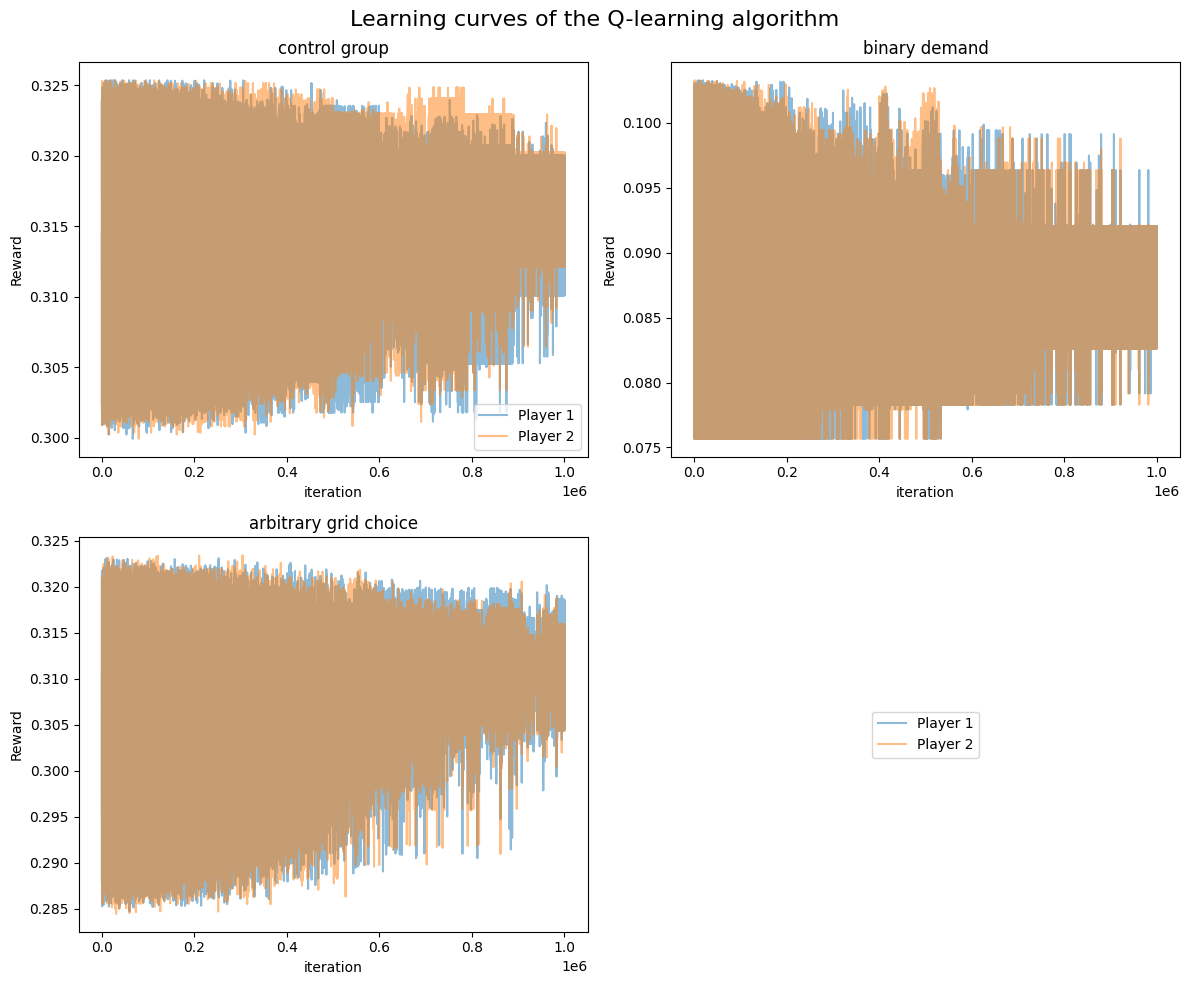

In [6]:
agg = np.array(aggregated_agents).mean(axis=1)
num_players = 2
num_graphs = len(agg)
legend = ["control group", "binary demand", "arbitrary grid choice"]

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(agg[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(agg[graph_num][:, player], alpha=0.5, label=f'Player {player + 1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(legend[graph_num])
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

    # Add a legend to the first subplot
    if graph_num == 0:
        ax.legend()

# Remove any unused subplots
if num_graphs < 3:
    for i in range(num_graphs, 3):
        fig.delaxes(axes[i])

# Create a legend in the last subplot
legend_ax = axes[-1]
legend_ax.axis('off')

# Get the legend handles and labels from the first subplot
handles, labels = axes[0].get_legend_handles_labels()

# Create the legend in the last subplot
legend_ax.legend(handles, labels, loc='center')

fig.suptitle('Learning curves of the Q-learning algorithm', fontsize=16)


# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

[[[0.54972942 0.50641784]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]
  [0.82158489 0.82158489]]

 [[0.57857143 0.57857143]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592653 0.69592653]
  [0.69592

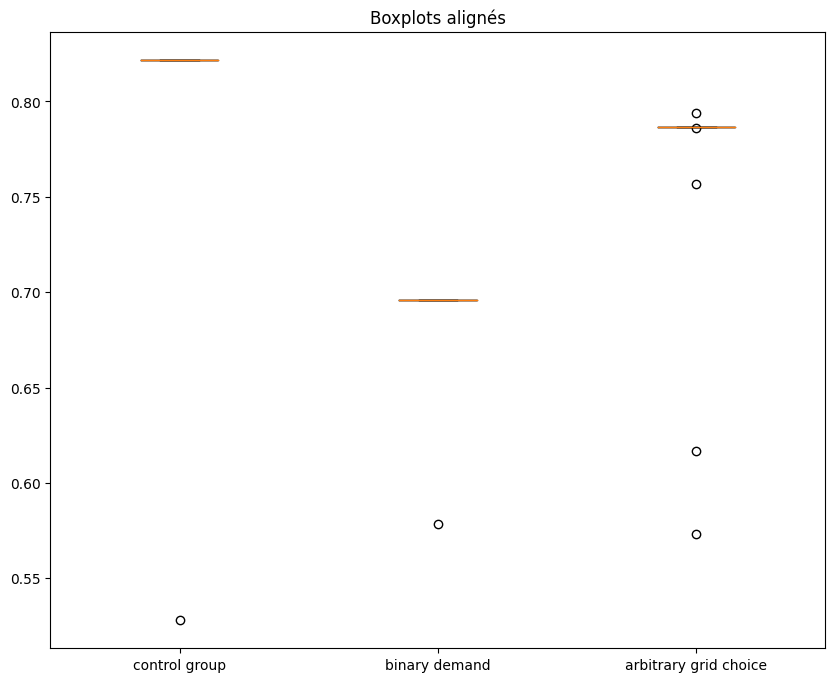

In [43]:

legend = ["control group", "binary demand", "arbitrary grid choice"]
prices = pr.PriceOptimizer()
prices_binary = pr.PriceOptimizer(binary_demand=True)
collusion_profit, collusion_prices = prices.CollusionPrice()
collusion_profit_binary, collusion_prices_binary = prices_binary.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
nash_profit_binary, nash_prices_binary = prices_binary.NashPrice()

RN = nash_profit, nash_profit_binary, nash_profit
RC = collusion_profit, collusion_profit_binary, collusion_profit

    
Rmean = np.zeros((len(aggregated_agents), len(aggregated_agents[0]), len(aggregated_agents[0][0][0])))
DRmean = np.zeros((len(aggregated_agents), len(aggregated_agents[0]), len(aggregated_agents[0][0][0]))) 

box = np.zeros((len(aggregated_agents), len(aggregated_agents[0])))
# Parameters
n_params = len(aggregated_agents)

# Loop through each parameter  
for param_ind in range(n_params):

  # Loop through each sample
  for sample_ind in range(len(aggregated_agents[0])):
    for j in range (2):
      Rmean[param_ind][sample_ind][j] = aggregated_agents[param_ind][sample_ind][-100:,j].mean()
      DRmean[param_ind][sample_ind][j] = (Rmean[param_ind][sample_ind][j] - RN[param_ind])/(RC[param_ind] - RN[param_ind]) 
      box = DRmean.mean(axis = 2)
print(DRmean)

# Mettre les données dans une liste
data = [box[param_ind] for param_ind in range(len(aggregated_agents))]


fig, ax = plt.subplots(figsize=(10, 8))

# Tracer les boxplots
ax.boxplot(data, 
           notch=False, 
           positions=[1,2,3]) 

# Personnaliser les axes
ax.set_xticks([1,2,3])
ax.set_xticklabels(legend)

# Ajouter un titre
plt.title('Boxplots alignés')

plt.show()

In [44]:
print(data[0])
print(data[1])
print(data[2])

[0.52807363 0.82158489 0.82158489 0.82158489 0.82158489 0.82158489
 0.82158489 0.82158489 0.82158489 0.82158489 0.82158489 0.82158489
 0.82158489 0.82158489 0.82158489 0.82158489 0.82158489 0.82158489
 0.82158489 0.82158489]
[0.57857143 0.69592653 0.69592653 0.69592653 0.69592653 0.69592653
 0.69592653 0.69592653 0.69592653 0.69592653 0.69592653 0.69592653
 0.69592653 0.69592653 0.69592653 0.69592653 0.69592653 0.69592653
 0.69592653 0.69592653]
[0.57350392 0.61684018 0.75677082 0.7938233  0.78591638 0.78666048
 0.78666048 0.78666048 0.78666048 0.78666048 0.78666048 0.78666048
 0.78666048 0.78666048 0.78666048 0.78666048 0.78666048 0.78666048
 0.78666048 0.78666048]


In [35]:
len(DRmean[0].mean(axis=1))

20

NameError: name 'lowess' is not defined

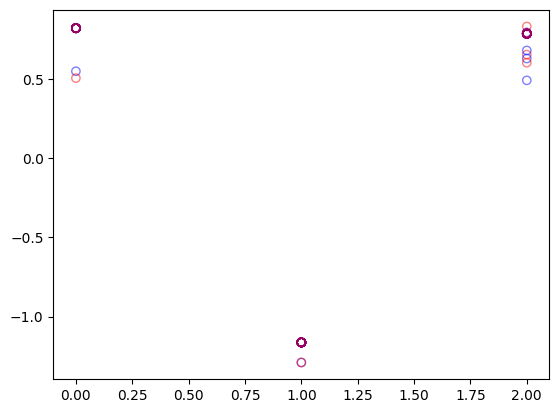

In [18]:
agg = np.array(aggregated_agents).mean(axis=1)
legend = ["control group", "binary demand", "arbitrary grid choice"]
prices = pr.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit

    
Rmean = np.zeros((len(aggregated_agents), len(aggregated_agents[0]), len(aggregated_agents[0][0][0])))
DRmean = np.zeros((len(aggregated_agents), len(aggregated_agents[0]), len(aggregated_agents[0][0][0]))) 

agg_Rmean = np.zeros((len(aggregated_agents), 2))
agg_DRmean = np.zeros((len(aggregated_agents), 2))  

# Parameters
n_params = len(aggregated_agents)

X = []
Y = []

handles = []
labels = []
# Loop through each parameter  
for param_ind in range(n_params):

  # Loop through each sample
  for sample_ind in range(len(aggregated_agents[0])):
    for j in range (2):
      Rmean[param_ind][sample_ind][j] = aggregated_agents[param_ind][sample_ind][-100:,j].mean()
      DRmean[param_ind][sample_ind][j] = (Rmean[param_ind][sample_ind][j] - RN)/(RC - RN) 
      agg_Rmean[param_ind][j] = agg[param_ind][-100:,j].mean()
      agg_DRmean[param_ind][j] = (agg_Rmean[param_ind][j] - RN)/(RC - RN) 
    
   
    # Plot the point
    h1 = plt.scatter(param_ind, DRmean[param_ind][sample_ind][0], marker='o', 
                     facecolor='none', edgecolor='b', alpha=0.5, label='player1')
    if param_ind==0 and sample_ind == 0:
      handles.append(h1)
      labels.append('player 1')
    
    h2 = plt.scatter(param_ind, DRmean[param_ind][sample_ind][1],
                marker='o', facecolor='none', edgecolor='r', alpha=0.5, label='player2')
    if param_ind==0 and sample_ind == 0:
      handles.append(h2)
      labels.append('player 2')
    
    X.append(param_ind)
    X.append(param_ind)
    Y.append(DRmean[param_ind][sample_ind][0])
    Y.append(DRmean[param_ind][sample_ind][1])
    

  # End of sample loop
reg = lowess.lowess(Y, X)[:,1]
h3 = plt.plot(X,reg, label = 'LOESS Smoothing regression')
handles.append(h3) 
labels.append('LOESS Smoothing regression')

av = np.mean(agg_DRmean, axis=1)
h4 = plt.plot([0,1,2],av, label='Average $\\Delta$ of players')
handles.append(h4) 
labels.append('Average $\\Delta$ of players')

plt.xlabel('$\\alpha$')
plt.ylabel('$\\Delta$')
plt.title('$\\Delta$ of players for the last 100 iterations as a function of the number of $\\alpha$')

handles = [handle[0] if type(handle)==list else handle for handle in handles]#in each list take all elements
labels = [label[0] if type(label)==list else label for label in labels]

plt.legend(handles, labels)
plt.show()

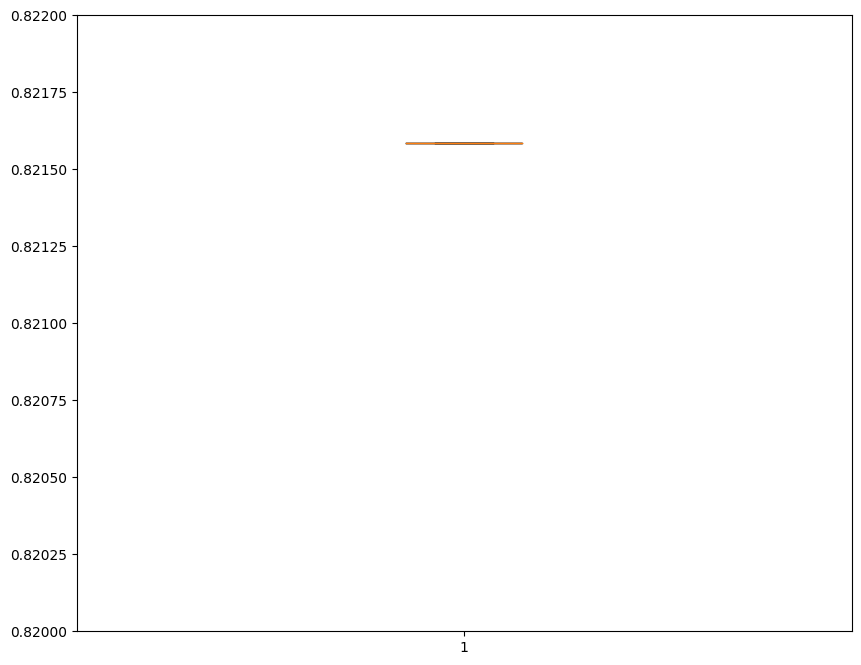

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(data[0], showfliers=False) 
plt.gca().set_ylim(0.82, 0.822) 


plt.show()

In [7]:
#attention redéfinir price nash and collusion for binary demand
prices = pr.PriceOptimizer()
prices_binary = pr.PriceOptimizer(binary_demand=True)
collusion_profit, collusion_prices = prices.CollusionPrice()
collusion_profit_binary, collusion_prices_binary = prices_binary.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
nash_profit_binary, nash_prices_binary = prices_binary.NashPrice()

RN = nash_profit, nash_profit_binary, nash_profit
RC = collusion_profit, collusion_profit_binary, collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN[i])/(RC[i] - RN[i]) 

print(DRmean)

[[0.78754212 0.79784271]
 [0.68480057 0.71655574]
 [0.76839293 0.73724761]]


[0.97131915 0.75       0.83446541]


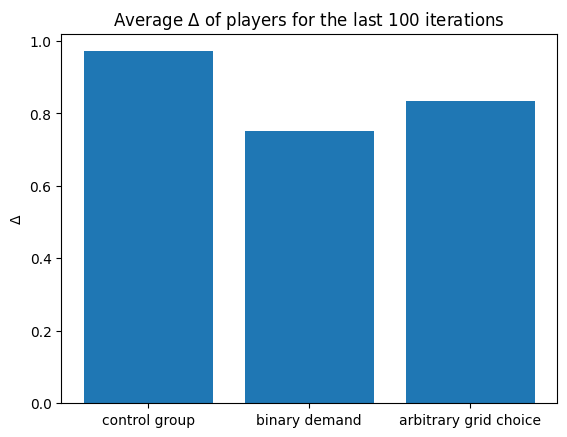

In [6]:
av = np.mean(DRmean, axis=1)
print(av)
plt.bar(["control group", "binary demand", "arbitrary grid choice"],av)
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations')
plt.show()